In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


구글 드라이브 마운트

교통사고 통계 : 시도 시구군별 교통사고 통계

In [2]:
import pandas as pd

In [10]:
시도교통사고=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/과제 분석 파일/도로교통공단_시도 시군구별 교통사고 통계_20221231 .csv', encoding='EUC_KR')
시도교통사고.head()

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,974,3,224,1006,121
1,서울,중구,943,2,246,866,100
2,서울,용산구,1014,11,250,1037,43
3,서울,성동구,948,8,226,941,55
4,서울,동대문구,1534,12,367,1308,168


In [11]:
data=시도교통사고.groupby('시도')[['사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']].sum()
data.sort_values('사고건수', ascending=False)

,사고건수,사망자수,중상자수,경상자수,부상신고자수
시도,,,,,
경기,52968,547,12201,59363,5813
서울,33698,221,7740,34347,3242
대구,11102,68,2703,11822,1196
경북,11037,309,3999,11363,827
부산,10882,113,3420,10513,896
경남,10611,258,4092,9547,906
전남,8335,201,2390,9718,503
충남,8164,230,2618,8892,454
인천,7695,95,1592,8559,382


In [12]:
data.reset_index(inplace=True)
data.head(10)

,시도,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,강원,6425,139,1910,7573,677
1,경기,52968,547,12201,59363,5813
2,경남,10611,258,4092,9547,906
3,경북,11037,309,3999,11363,827
4,광주,7122,58,1088,9171,463
5,대구,11102,68,2703,11822,1196
6,대전,6841,51,1433,8155,262
7,부산,10882,113,3420,10513,896
8,서울,33698,221,7740,34347,3242
9,세종,932,17,234,744,352


In [5]:
#차트에 한글 지원하기
!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.2 MB/s eta 0:00:00


In [6]:
import matplotlib.pyplot as plt

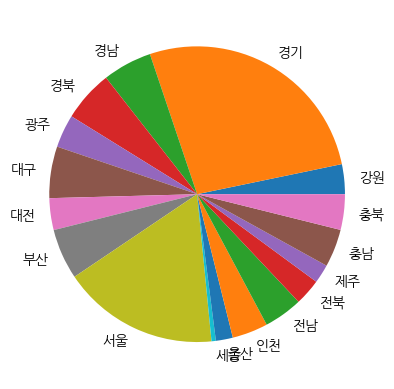

In [13]:
plt.pie(data['사고건수'], labels=data['시도'])
plt.show()

교통사고 통계 : 사고 유형별 교통사고 통계

In [14]:
유형별=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/과제 분석 파일/도로교통공단_사고유형별 교통사고 통계_20221231.csv', encoding='EUC_KR')
유형별.head()

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,13224,432,5909,7115,554
1,차대사람,차도통행중,차도통행중,4401,148,1617,2471,318
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,2100,41,584,1377,174
3,차대사람,보도통행중,보도통행중,2589,24,822,1736,168
4,차대사람,기타,기타,14971,256,4694,9475,1348


In [15]:
data=유형별.groupby('사고유형대분류')[['사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']].sum()
data.sort_values('사고건수', ascending=False)

,사고건수,사망자수,중상자수,경상자수,부상신고자수
사고유형대분류,,,,,
차대차,151676,1171,34954,186035,13733
차대사람,37285,901,13626,22174,2562
차량단독,7871,660,3133,4219,1362
철길건널목,4,3,2,2,1


In [16]:
data.reset_index(inplace=True)
data.head(10)

,사고유형대분류,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,37285,901,13626,22174,2562
1,차대차,151676,1171,34954,186035,13733
2,차량단독,7871,660,3133,4219,1362
3,철길건널목,4,3,2,2,1


In [17]:
import numpy as np

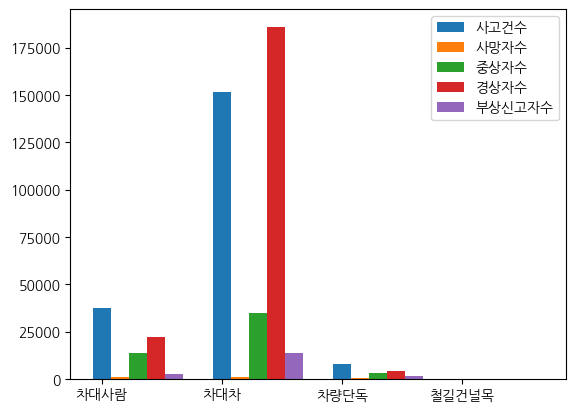

In [18]:
pos = np.array(range(len(data['사고유형대분류'])))
plt.xticks(pos, data['사고유형대분류'])

plt.bar(pos, data['사고건수'], label = '사고건수', width=0.15)
plt.bar(pos+0.15, data['사망자수'], label = '사망자수', width=0.15)
plt.bar(pos+0.3, data['중상자수'], label = '중상자수', width=0.15)
plt.bar(pos+0.45, data['경상자수'], label = '경상자수', width=0.15)
plt.bar(pos+0.6, data['부상신고자수'], label = '부상신고자수', width=0.15)
plt.legend()
plt.show()


교통사고 통계 : 가해 운전자 연령층별 월별 교통사고 통계

In [19]:
import pandas as pd

In [21]:
연령층=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/과제 분석 파일/도로교통공단_가해운전자 연령층별 월별 교통사고 통계_20221231.csv', encoding='EUC_KR')
연령층.head()

,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,1,435,6,123,458,52
1,20세이하,2,357,2,102,349,54
2,20세이하,3,473,3,141,464,73
3,20세이하,4,580,7,154,559,97
4,20세이하,5,713,6,191,631,133


In [25]:
data=연령층.groupby('가해자연령층')[['발생월', '사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']].sum()
data

,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
가해자연령층,,,,,,
20세이하,78,6508,72,1811,5997,1055
21-30세,78,26904,335,6845,30295,2566
31-40세,78,28402,317,7135,31607,2545
41-50세,78,33915,409,8813,36702,2874
51-60세,78,44581,570,11834,48206,3592
61-64세,78,19160,297,5226,20938,1402
65세이상,78,34652,735,9746,36602,2933
불명,78,2714,0,305,2083,691


In [26]:
data=연령층.groupby('가해자연령층')[['발생월', '사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']].sum()
data.sort_values('사고건수', ascending=False)

,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
가해자연령층,,,,,,
51-60세,78,44581,570,11834,48206,3592
65세이상,78,34652,735,9746,36602,2933
41-50세,78,33915,409,8813,36702,2874
31-40세,78,28402,317,7135,31607,2545
21-30세,78,26904,335,6845,30295,2566
61-64세,78,19160,297,5226,20938,1402
20세이하,78,6508,72,1811,5997,1055
불명,78,2714,0,305,2083,691


In [29]:
data.reset_index(inplace=True)
data.head(10)

,가해자연령층,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,78,6508,72,1811,5997,1055
1,21-30세,78,26904,335,6845,30295,2566
2,31-40세,78,28402,317,7135,31607,2545
3,41-50세,78,33915,409,8813,36702,2874
4,51-60세,78,44581,570,11834,48206,3592
5,61-64세,78,19160,297,5226,20938,1402
6,65세이상,78,34652,735,9746,36602,2933
7,불명,78,2714,0,305,2083,691


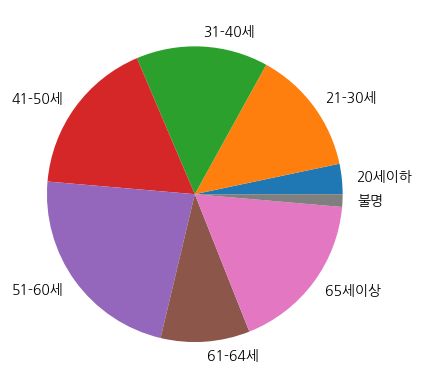

In [30]:
plt.pie(data['사고건수'], labels=data['가해자연령층'])
plt.show()

교통사고 통계 : 연도별 교통사고 통계

In [31]:
연도별=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/과제 분석 파일/한국도로공사_교통사고통계_20221231.csv', encoding='EUC_KR')
연도별.head()

,연도,사고,사망,부상
0,2000,3910,569,2845
1,2001,3638,456,2331
2,2002,3957,421,2115
3,2003,3585,348,1843
4,2004,3242,300,1555


In [35]:
data=연도별.groupby('연도')[['사고', '사망', '부상']].sum()
data.sort_values('연도', ascending=False)

,사고,사망,부상
연도,,,
2022,1672,156,733
2021,1735,171,794
2020,1834,179,861
2019,1931,176,830
2018,2030,227,858
2017,2145,214,911
2016,2195,239,1424
2015,2251,223,1054
2014,2395,253,1148


In [36]:
data.reset_index(inplace=True)
data.head(10)

,연도,사고,사망,부상
0,2000,3910,569,2845
1,2001,3638,456,2331
2,2002,3957,421,2115
3,2003,3585,348,1843
4,2004,3242,300,1555
5,2005,2880,249,1170
6,2006,2583,284,1131
7,2007,2550,283,1114
8,2008,2449,265,955
9,2009,2374,248,1031


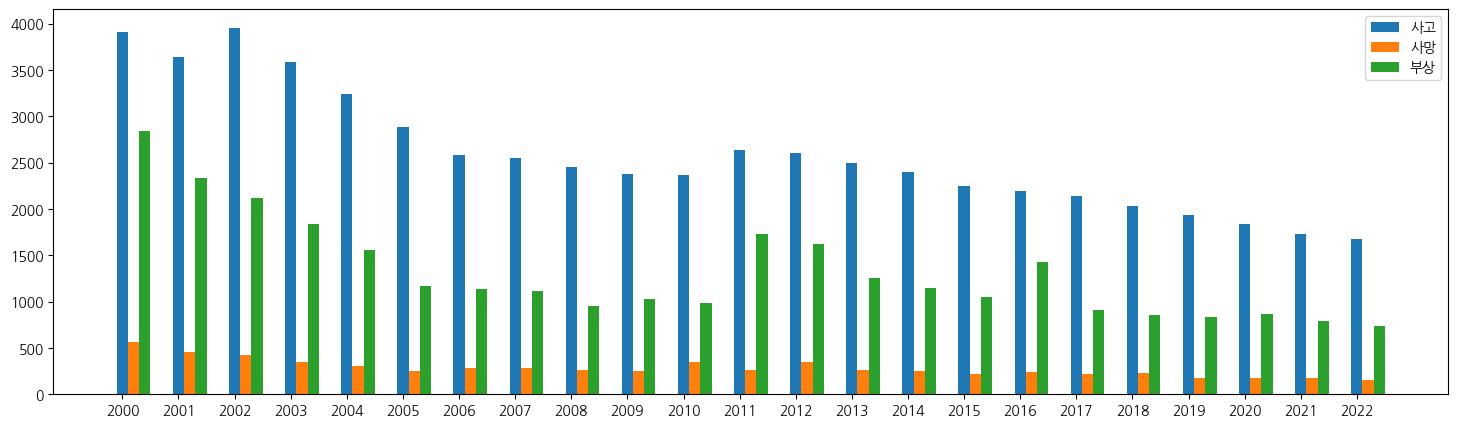

In [42]:
plt.figure(figsize=(18, 5))
pos = np.array(range(len(data['연도'])))
plt.xticks(pos, data['연도'])


plt.bar(pos, data['사고'], label = '사고', width=0.2)
plt.bar(pos+0.2, data['사망'], label = '사망', width=0.2)
plt.bar(pos+0.4, data['부상'], label = '부상', width=0.2)
plt.legend()
plt.show()